In [ ]:
라이브러리 임포트

In [3]:
import numpy as np
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray

from scipy import signal, ndimage
import matplotlib.pylab as pylab

In [1]:
def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')

In [ ]:
LOG, DOG - scipy signal 모듈의 convolve2d() 함수 사용 

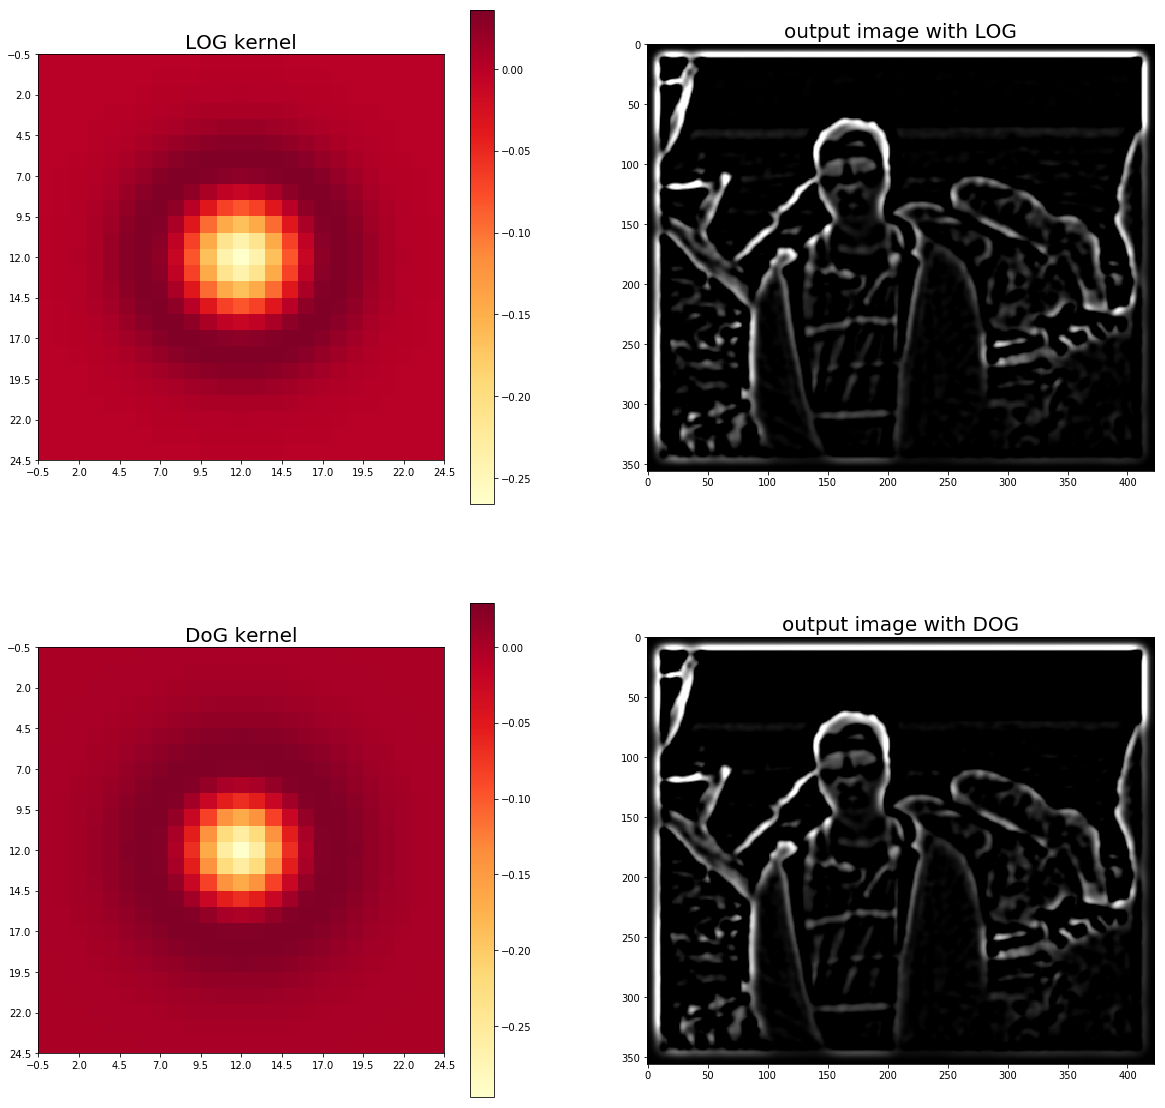

In [4]:
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from numpy import pi

def plot_kernel(kernel, s, name):
    pylab.title(name, size=20),
    pylab.imshow(kernel, cmap='YlOrRd') # cmap='jet' or 'gray_r')
    ax = pylab.gca()
    ax.set_xticks(np.arange(-0.5, kernel.shape[0], 2.5))
    ax.set_yticks(np.arange(-0.5, kernel.shape[1], 2.5))
    pylab.colorbar()
    
def LOG(k=12, s=3):
    n = 2*k+1  				 				 				# 커널 크기
    kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            x, y = j-k, i-k  				 				# 중심 화소에서 좌표 계산
            dG = (x**2 + y**2)/(2*s**2)
            kernel[i,j] = -(1-dG) * np.exp(-dG)/(pi*s**4)
    kernel = np.round(kernel / np.sqrt((kernel**2).sum()), 3)
    return kernel

def DOG(k=12, s=3):
    n = 2*k+1  				 				 				# 커널 크기
    s1, s2 = s * np.sqrt(2), s / np.sqrt(2)
    kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            x, y = j-k, i-k  				 				# 중심 화소에서 좌표 계산
            dG1 = (x**2 + y**2)/(2*s1**2)
            dG2 = (x**2 + y**2)/(2*s2**2)
            kernel[i,j] = np.exp(-dG1)/(2*pi*s1**2) - np.exp(-dG2)/(2*pi*s2**2)
    kernel = np.round(kernel / np.sqrt((kernel**2).sum()),3)
    return kernel

s = 3  				 				 			 			# LoG를 위한 표준 편차
img = rgb2gray(imread('../images/me.jpg'))

kernel1 = LOG()
kernel2 = DOG()
outimg1 = convolve2d(img, kernel1)
outimg2 = convolve2d(img, kernel2)

pylab.figure(figsize=(20,20))
pylab.subplot(221), plot_kernel(kernel1, s, 'LOG kernel')
pylab.subplot(222), pylab.title('output image with LOG', size=20)
pylab.imshow(np.clip(outimg1, 0,1), cmap='gray')
pylab.subplot(223), plot_kernel(kernel2, s, 'DoG kernel')
pylab.subplot(224), pylab.title('output image with DOG', size=20)
pylab.imshow(np.clip(outimg2, 0,1), cmap='gray')
pylab.show()

In [ ]:
SciPy ndimage 모듈을 사용한 LoG 필터

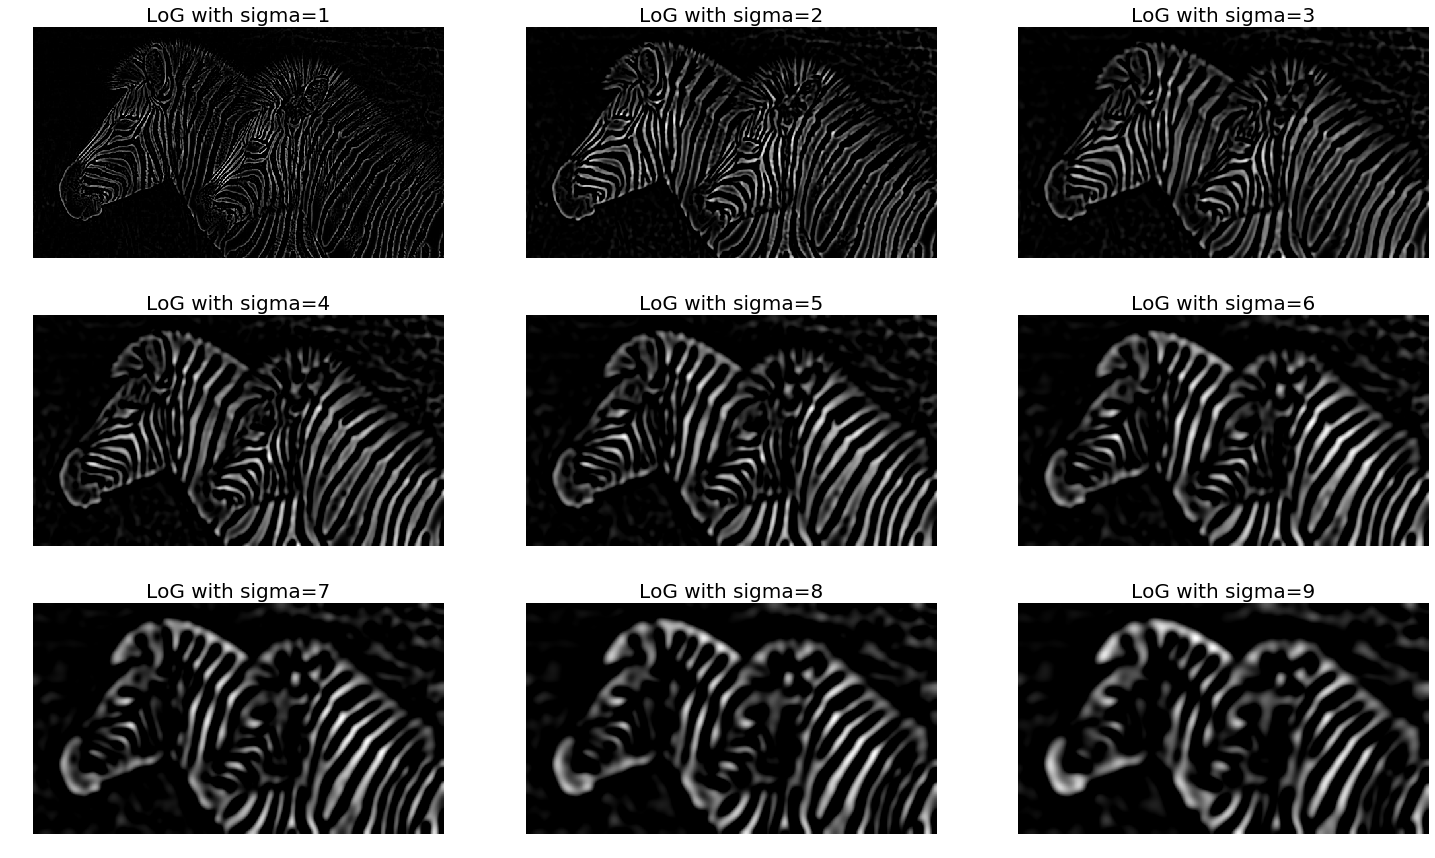

In [5]:
img = rgb2gray(imread('../images/zebras.jpg'))

fig = pylab.figure(figsize=(25,15)), pylab.gray()
for sigma in range(1,10):
    pylab.subplot(3,3,sigma)
    img_log = ndimage.gaussian_laplace(img, sigma=sigma)
    pylab.imshow(np.clip(img_log,0,1)), pylab.axis('off')
    pylab.title('LoG with sigma=' + str(sigma), size=20)
pylab.show()

In [ ]:
제로 크로싱으로 에지 검출

In [ ]:
def zero_crossing(result):
    ''' 알고리즘 구현하라 '''
    

NameError: name 'zero_crossing' is not defined

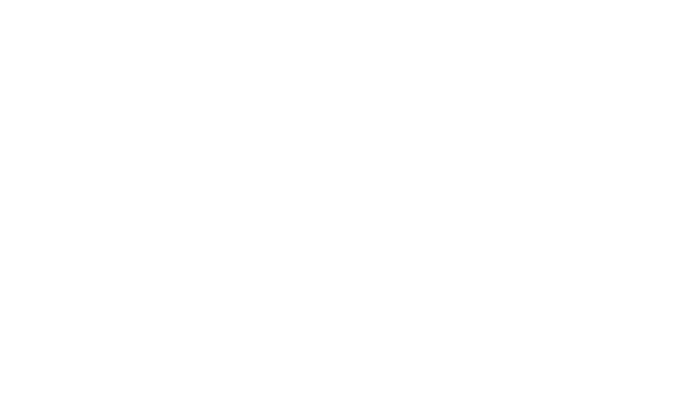

In [6]:
fig = pylab.figure(figsize=(25,15)), pylab.gray()

for sigma in range(2,10, 2):
    pylab.subplot(2,2,sigma/2), pylab.axis('off')
    result = ndimage.gaussian_laplace(img, sigma=sigma)
    pylab.imshow(zero_crossing(result)) 					# zero_crossing() 알로리즘 구현하라
    pylab.title('LoG with zero-crossing, sigma=' + str(sigma), size=20)
pylab.show()

In [ ]:
PIL를 사용하여 에지 찾기와 향상

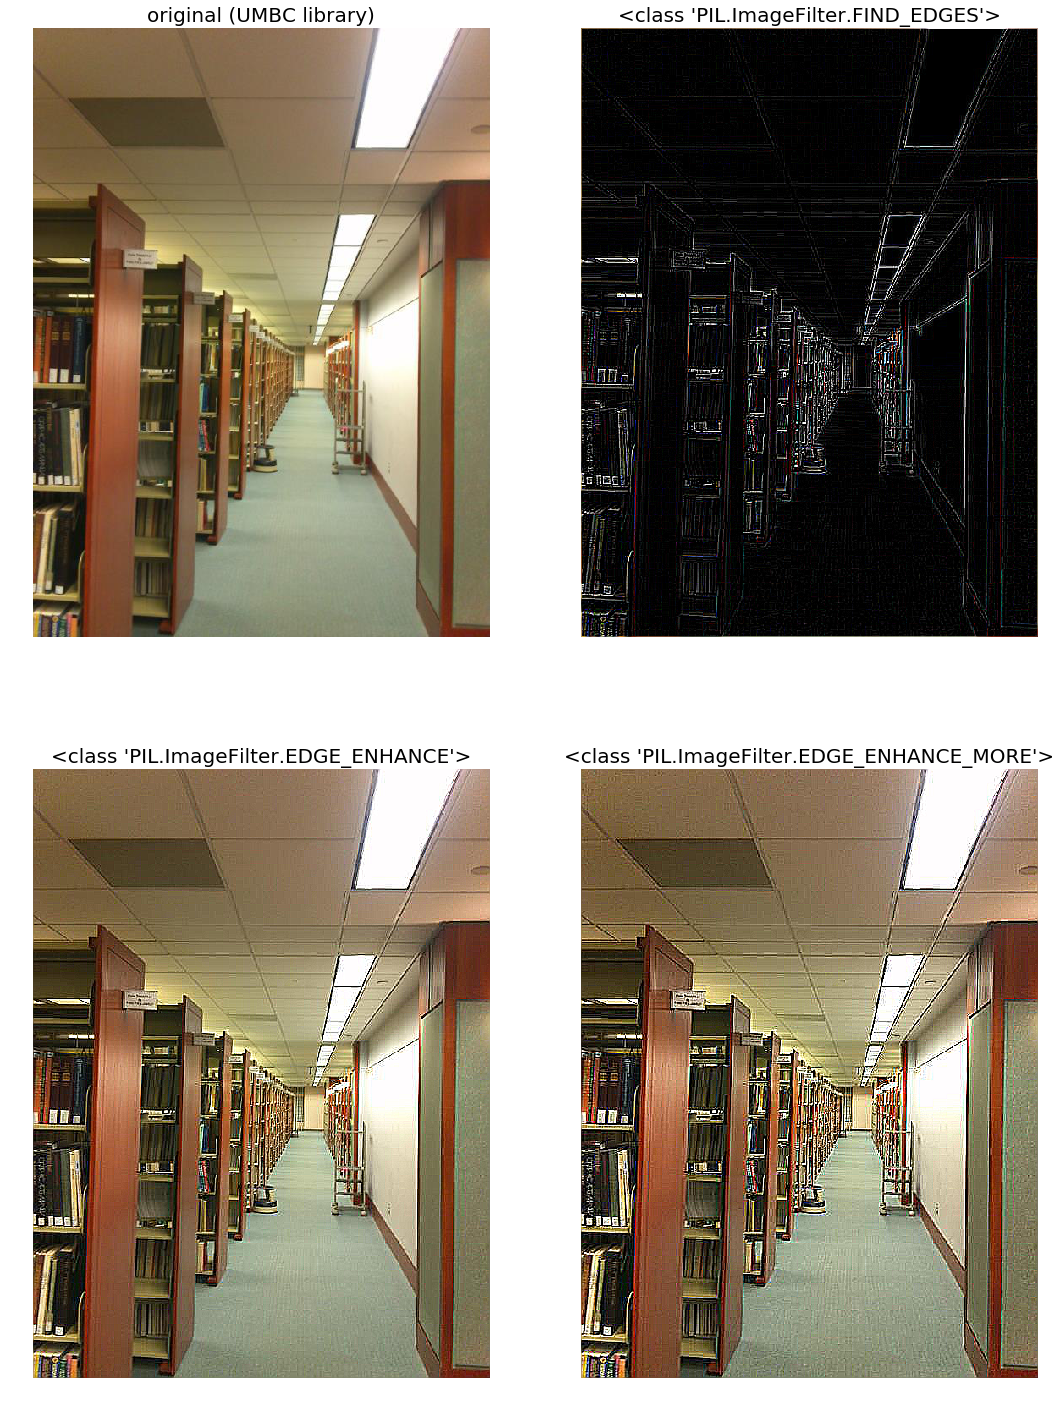

In [9]:
from PIL.ImageFilter import FIND_EDGES, EDGE_ENHANCE, EDGE_ENHANCE_MORE
from PIL import Image

im = Image.open('../images/umbc_lib.jpg')
pylab.figure(figsize=(18,25))
pylab.subplot(2,2,1), plot_image(im, 'original (UMBC library)')

for i, f in enumerate([FIND_EDGES, EDGE_ENHANCE, EDGE_ENHANCE_MORE]):
    im1 = im.filter(f)
    pylab.subplot(2,2,i+2), plot_image(im1, str(f))
pylab.show()

In [ ]:
가우시안 피라미드를

C:\Users\bae22\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


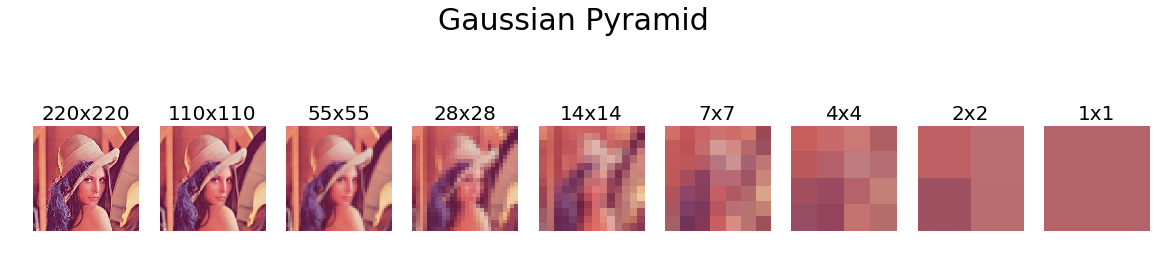

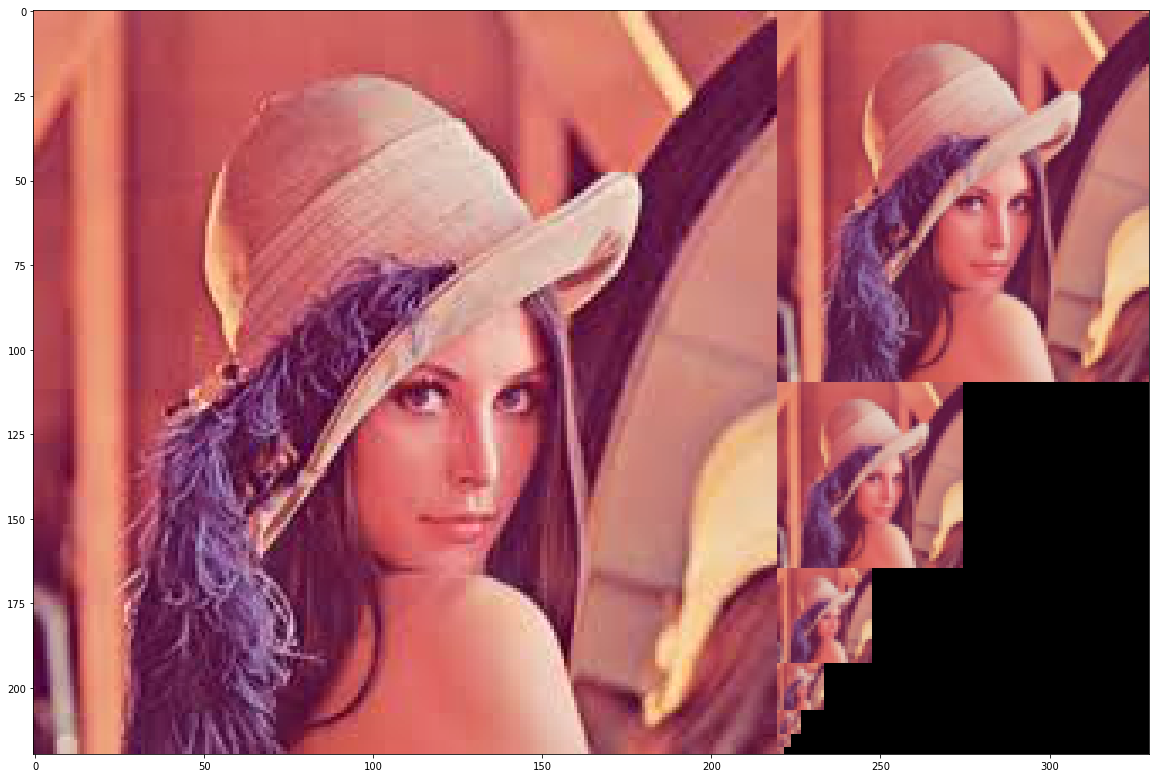

In [10]:
from skimage.transform import pyramid_gaussian
image = imread('../images/lena.jpg')
nrows, ncols = image.shape[:2]
pyramid = tuple(pyramid_gaussian(image, downscale=2))
n = len(pyramid)

pylab.figure(figsize=(20,5))
for i, p in enumerate(pyramid):
    pylab.subplot(1,n,i+1), plot_image(p, str(p.shape[0]) + 'x' + str(p.shape[1]) )
pylab.suptitle('Gaussian Pyramid', size=30)
pylab.show()

compos_image = np.zeros((nrows, ncols + ncols // 2, 3), dtype=np.double)
compos_image[:nrows, :ncols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    compos_image[i_row:i_row + n_rows, ncols:ncols + n_cols] = p
    i_row += n_rows
    
fig, axes = pylab.subplots(figsize=(20,20))
axes.imshow(compos_image)
pylab.show()

In [ ]:
가우시안 피라미드

In [14]:
from skimage.transform import pyramid_reduce

def get_gaussian_pyramid(image):
    '''
    입력: 컬러 영상
    출력: 리스트로 된 영상의 가우시안 피라미드
    '''
    # 여기에 코드 작성
    # reduce () 함수로 피라미드의 각 레벨에서 영상을 반복적으로 계산하고
    # gaussian_pyramid 리스트에 추가
    gaussian_pyramid = [image]
    rows, cols, dim = image.shape
    while rows > 1 and cols > 1:
        image = pyramid_reduce(image, downscale=2)
        gaussian_pyramid.append(image)
        rows //= 2 
        cols //= 2
    return gaussian_pyramid   

In [ ]:
라플라시안 피라미드

In [13]:
from skimage.transform import pyramid_expand, resize

def get_laplacian_pyramid(gaussian_pyramid):
    '''
    input: 리스트로 된 가우시안 피라미드 영상
    output: 리스트로 된 라플라시안 피라미드 영상
    '''
    laplacian_pyramid = []
    # 여기에 코드 작성
    # expand() 함수로 피라미드의 각 레벨에서 영상을 반복적으로 계산하고
    # gaussian_pyramid 리스트에 추가
    
    laplacian_pyramid = [gaussian_pyramid[len(gaussian_pyramid)-1]]    # 최소 영상
    for i in range(len(gaussian_pyramid)-2, -1, -1):
        img_exp = resize(pyramid_expand(gaussian_pyramid[i+1]), gaussian_pyramid[i].shape)
        image = gaussian_pyramid[i] - img_exp
        laplacian_pyramid.append(np.copy(image))
    
    laplacian_pyramid = laplacian_pyramid[::-1]
    return laplacian_pyramid

C:\Users\bae22\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\bae22\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


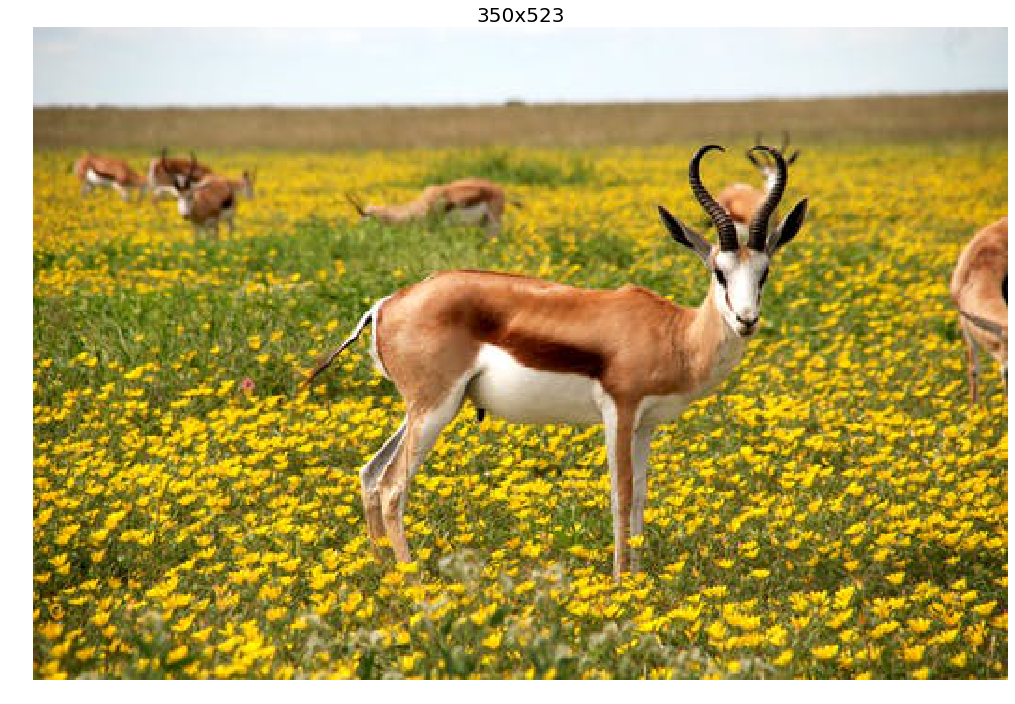

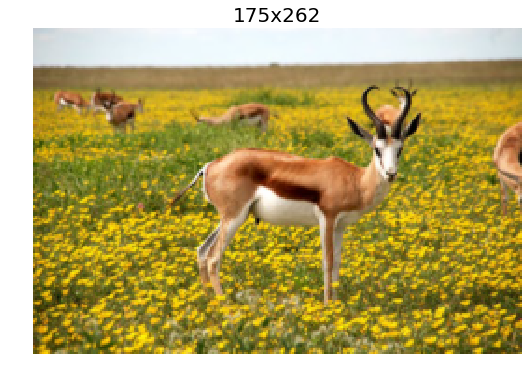

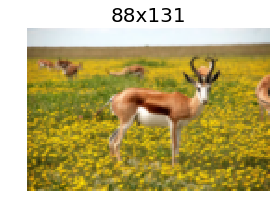

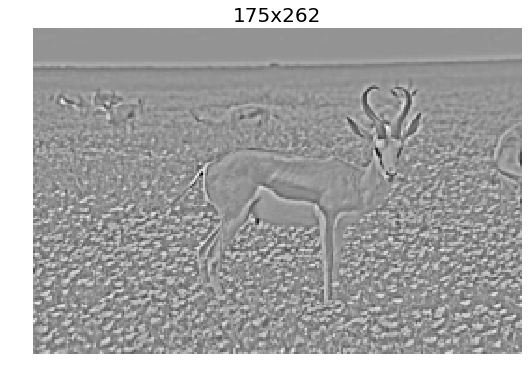

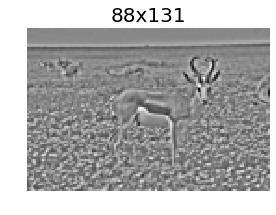

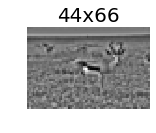

In [15]:
image = imread('../images/antelops.jpeg')

gaussian_pyramid = get_gaussian_pyramid(image)
laplacian_pyramid = get_laplacian_pyramid(gaussian_pyramid)
w, h = 20, 12
for i in range(3):
    pylab.figure(figsize=(w,h))
    p = gaussian_pyramid[i]
    pylab.imshow(p), pylab.axis('off')
    pylab.title(str(p.shape[0]) + 'x' + str(p.shape[1]), size=20)
    w, h = w / 2, h / 2
    pylab.show()
    
w, h = 10, 6
for i in range(1,4):
    pylab.figure(figsize=(w,h))
    p = laplacian_pyramid[i]
    pylab.imshow(rgb2gray(p), cmap='gray'), pylab.axis('off')
    pylab.title(str(p.shape[0]) + 'x' + str(p.shape[1]), size=20)
    w, h = w / 2, h / 2
    pylab.show()

In [ ]:
라플라시안 피라미드에서만 영상 재구성

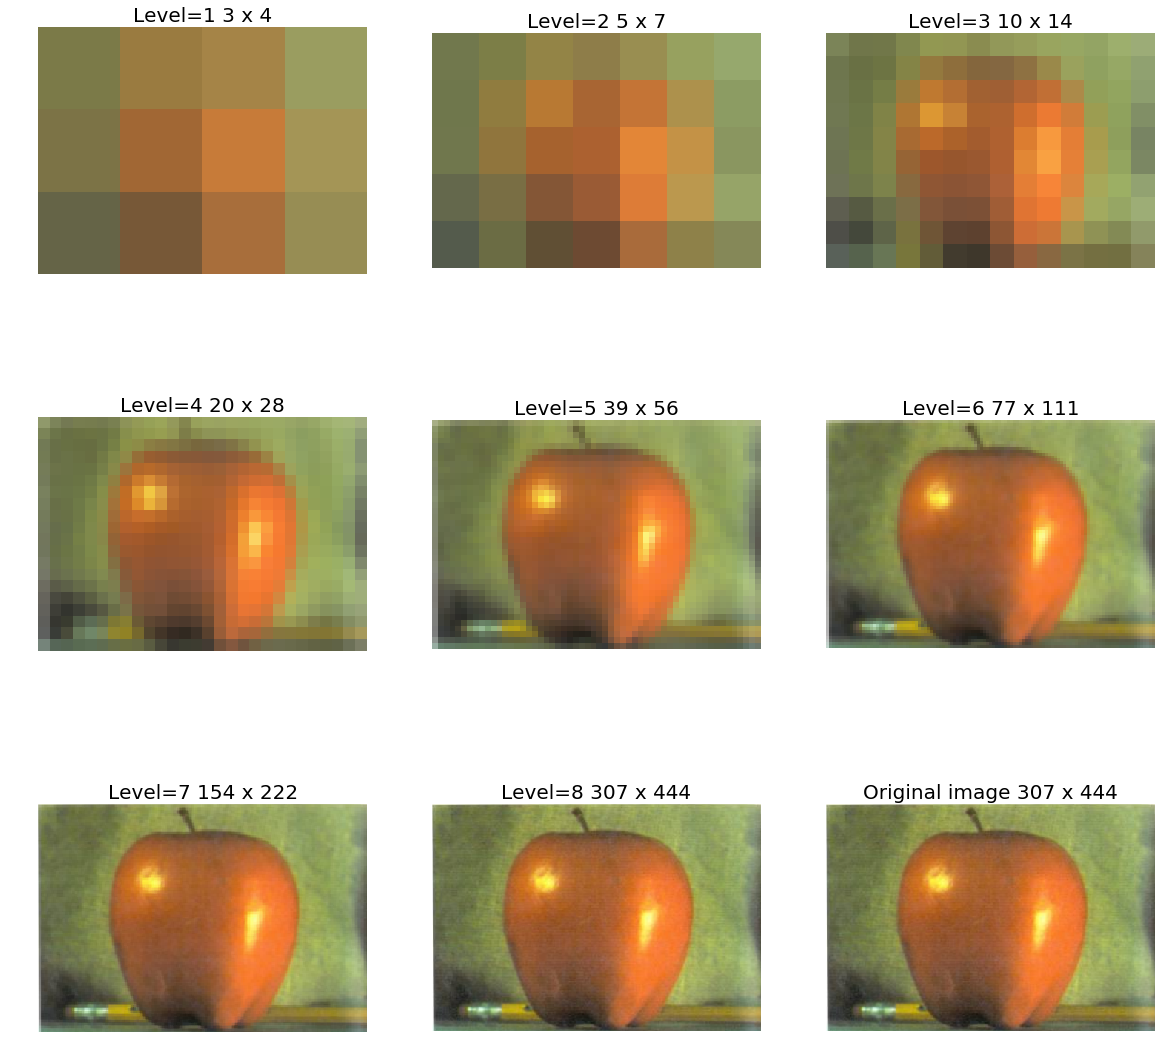

In [18]:
from skimage.transform import pyramid_reduce, pyramid_laplacian, pyramid_expand, resize

def reconstruct_image_from_laplacian_pyramid(pyramid):
    i = len(pyramid) - 2
    prev = pyramid[i+1]
    pylab.figure(figsize=(20,20))
    j = 1
    while i >= 0:
        prev = resize(pyramid_expand(prev, upscale=2), pyramid[i].shape) # 이전 영상
        im = np.clip(pyramid[i] + prev,0,1)
        title = 'Level=%d %d x %d' % (j, im.shape[0], im.shape[1])
        pylab.subplot(3, 3, j), plot_image(im, title)
        prev = im
        i -= 1
        j += 1
    title = 'Original image %d x %d' % (im.shape[0], im.shape[1])
    pylab.subplot(3, 3, j), plot_image(image, title)
    pylab.show()
    return im

image = img_as_float(imread('../images/apple.png')[...,:3])
pyramid = get_laplacian_pyramid(get_gaussian_pyramid(image))
im = reconstruct_image_from_laplacian_pyramid(pyramid)

In [ ]:
피라미드를 사용한 영상 블렌딩

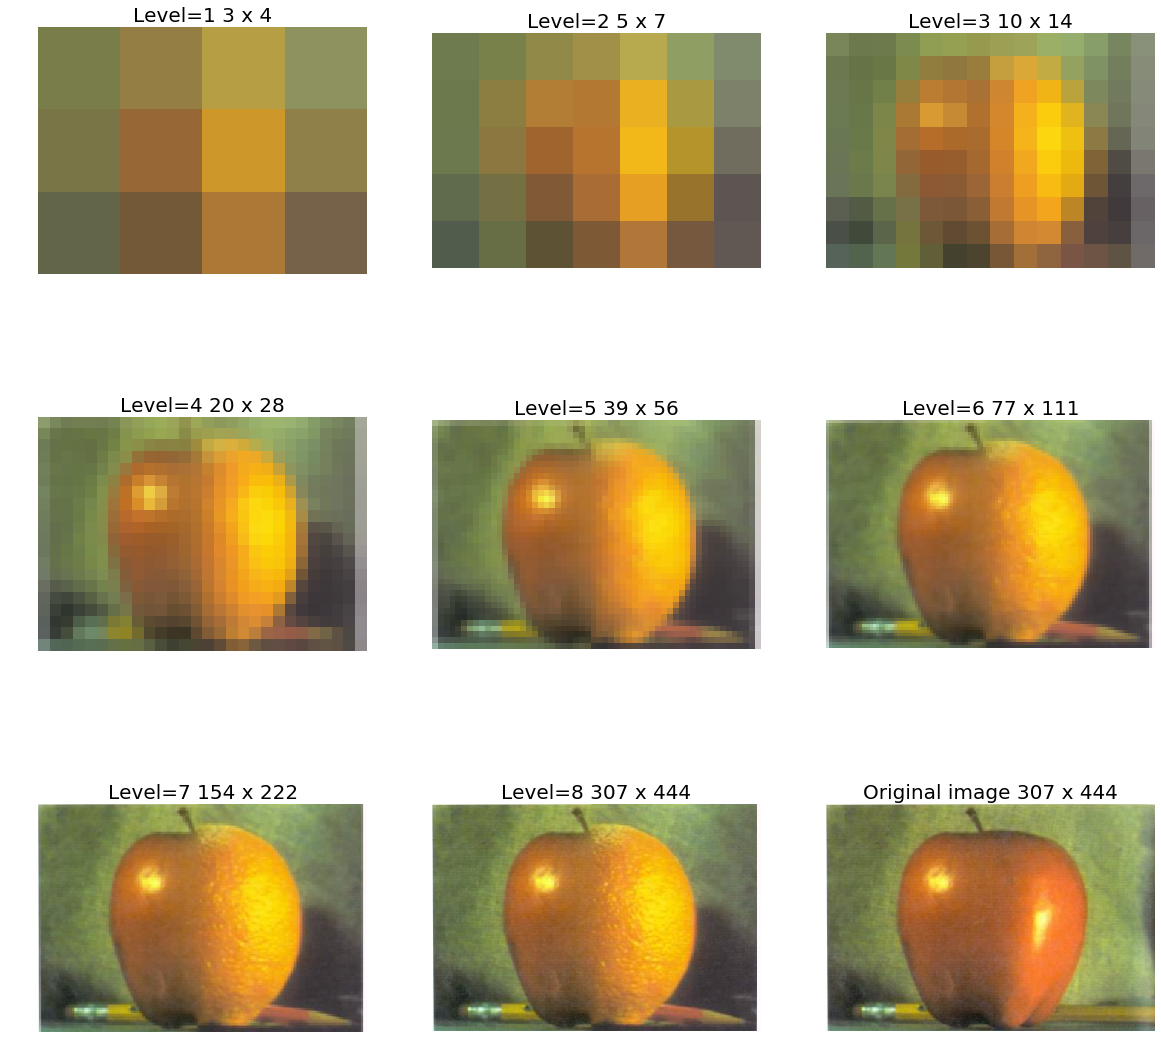

In [17]:
A = img_as_float(imread('../images/apple.png')[...,:3]) 	 # 4번째 알파 채널 제외
B = img_as_float(imread('../images/orange.png')[...,:3]) 	 # RGB 채널만 사용
M = img_as_float(imread('../images/mask.png')[...,:3]) 	 	 # [0,1] 범위로 변경

pyramidA = get_laplacian_pyramid(get_gaussian_pyramid(A))
pyramidB = get_laplacian_pyramid(get_gaussian_pyramid(B))
pyramidM = get_gaussian_pyramid(M)

# 블랜딩된 피라미드 구성
pyramidC = [ M*A + (1-M)*B for A,B,M in zip(pyramidA, pyramidB,pyramidM)]
I = reconstruct_image_from_laplacian_pyramid(pyramidC)